In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import sys
import glob
import os
import cv2
import time

from PIL import Image

from scipy.spatial import cKDTree
from scipy.ndimage import binary_fill_holes

In [4]:
# select the device for computation
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"using device: {device}")

using device: cuda


In [15]:
def find_black_area(image, window_size):
    h, w = image.shape
    max_density = -1
    best_coords = (0, 0)

    # Slide the window over the image
    for y in range(0, h - window_size[1] + 1, 1):
        for x in range(0, w - window_size[0] + 1, 1):
            # Extract the window from the image
            window = image[y:y + window_size[1], x:x + window_size[0]]

            # Count the number of black pixels
            black_pixel_count = np.sum(window == 0)

            # Track the window with the maximum number of black pixels
            if black_pixel_count > max_density:
                max_density = black_pixel_count
                best_coords = (x, y)

    return best_coords, max_density

Processing file 0001/1147:	Round01-Hive01-2024_06_05-h01bee01.JPG
400


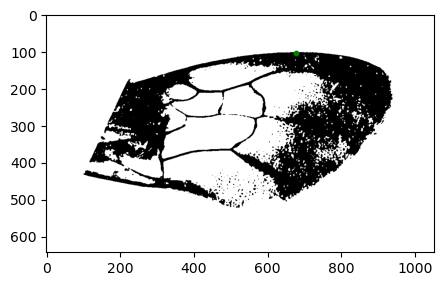

Processing file 0002/1147:	Round01-Hive01-2024_06_05-h01bee16.JPG
400


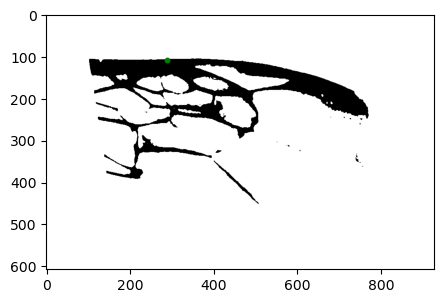

Processing file 0003/1147:	Round01-Hive01-2024_06_05-h01bee19.JPG
400


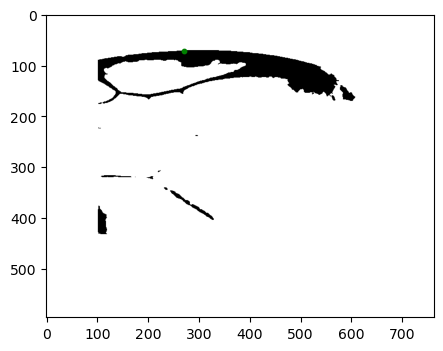

Processing file 0004/1147:	Round01-Hive01-2024_06_05-h01bee29.JPG
400


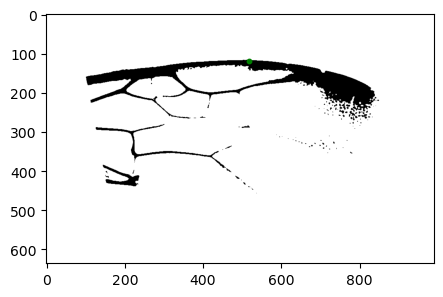

Processing file 0005/1147:	Round01-Hive01-2024_06_05-h01bee32.JPG
400


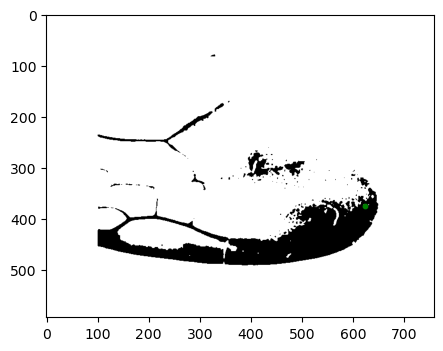

Processing file 0006/1147:	Round01-Hive01-2024_06_05-h01bee37.JPG
400


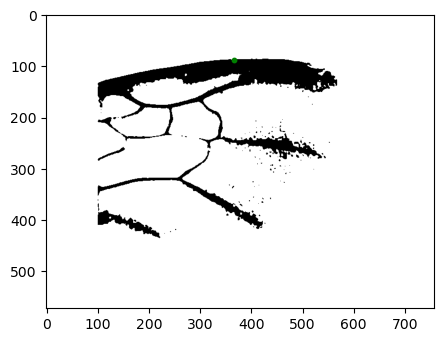

Processing file 0007/1147:	Round01-Hive01-2024_06_05-h01bee46.JPG
400


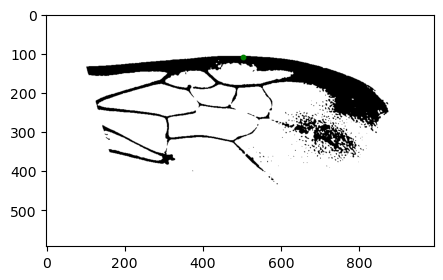

Processing file 0008/1147:	Round01-Hive01-2024_06_05-h01bee51.JPG
400


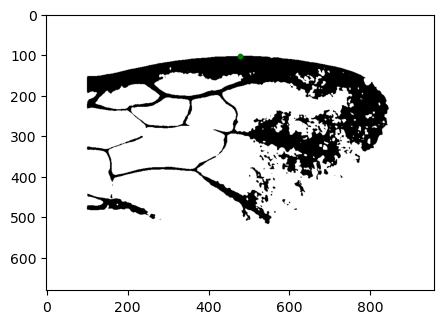

Processing file 0009/1147:	Round01-Hive01-2024_06_11-h01b02.JPG
377


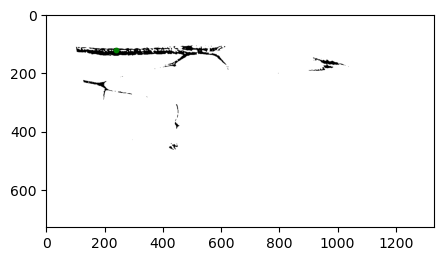

Processing file 0010/1147:	Round01-Hive01-2024_06_11-h01b05.JPG
151


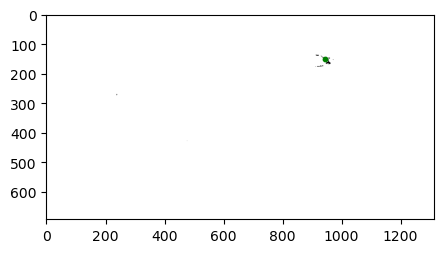

Processing file 0011/1147:	Round01-Hive01-2024_06_11-h01b18.JPG
395


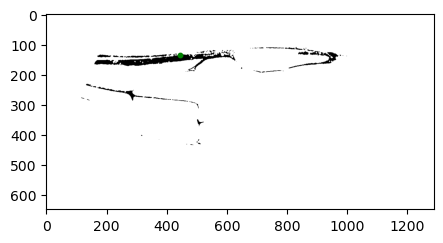

Processing file 0012/1147:	Round01-Hive01-2024_06_11-h01b19.JPG
342


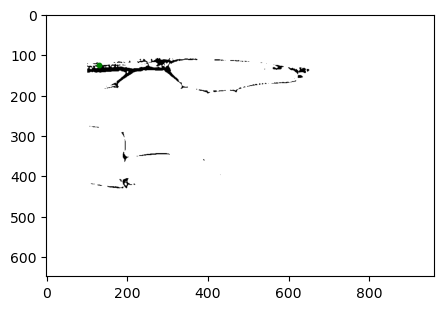

Processing file 0013/1147:	Round01-Hive01-2024_06_11-h01b21.JPG
264


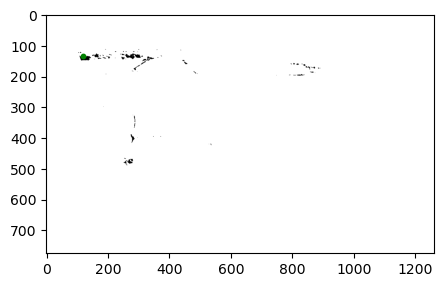

Processing file 0014/1147:	Round01-Hive01-2024_06_11-h01b23.JPG
357


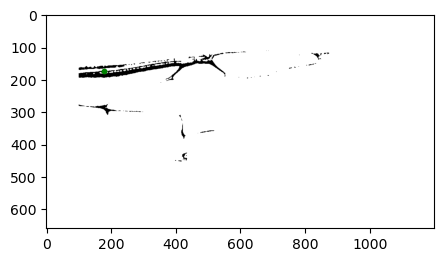

Processing file 0015/1147:	Round01-Hive01-2024_06_11-h01b24.JPG
275


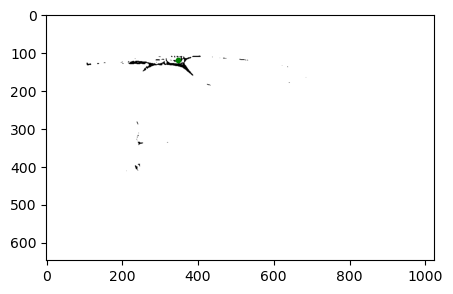

Processing file 0016/1147:	Round01-Hive01-2024_06_11-h01b25.JPG
150


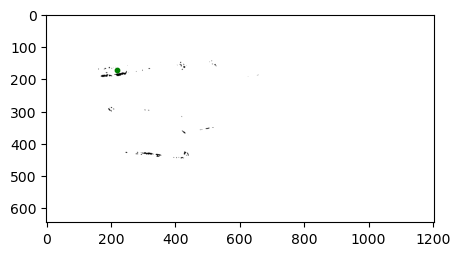

Processing file 0017/1147:	Round01-Hive01-2024_06_11-h01b28.JPG
351


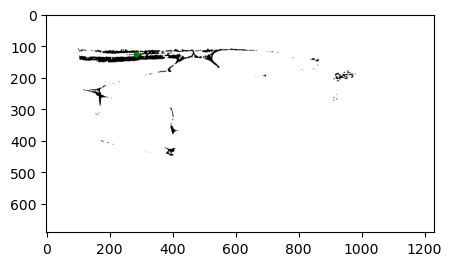

Processing file 0018/1147:	Round01-Hive01-2024_06_11-h01b36.JPG


KeyboardInterrupt: 

In [18]:
input_dir = "/mnt/c/Projects/Master/Data/Processed/2-LiveWingWingCropsImproved/"

# Find all jpg files
jpg_files = []
for root, _, files in os.walk(input_dir):
    for file in files:
        if file.endswith(".JPG") or file.endswith(".jpg"):
            jpg_files.append(os.path.join(root, file))

# Process every file
total_files = len(jpg_files)
digits = len(str(total_files))
for idx, jpg_file_path in enumerate(jpg_files, 1):
    jpg_basename = os.path.basename(jpg_file_path)
    relative_jpg_path = jpg_file_path.removeprefix(input_dir)
    print(f"Processing file {idx:0{digits}}/{total_files}:\t{relative_jpg_path}")
    
    # Process image
    image = cv2.imread(jpg_file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred_image, 50, 255, cv2.THRESH_BINARY)
    
    window_size = (20, 20)
    best_coords, max_density = find_black_area(thresh, window_size)
    if best_coords == (0, 0):
        print("(0, 0)")
    print(max_density)
    
    # Plot the contour and the selected points
    plt.figure(figsize=(5, 5))
    plt.imshow(thresh, cmap="gray")
    plt.scatter(best_coords[0], best_coords[1], c="green", s=10)
    plt.axis("on")
    plt.show()


In [14]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)